In [1]:
import os
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from collections import defaultdict
stop_words = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()

directory = ""
texts = []
for entry in os.scandir():
    if (entry.path.endswith(".txt") and entry.is_file()):
        with open(entry.path) as f:
            buffer = f.read()
            text = " ".join(buffer.lower().split())
            
            text_p = "".join([char for char in text if char not in string.punctuation])
            result = ''.join([i for i in text_p if not i.isdigit()])
            texts.append(result)
            
tokenized = []

dictionary = defaultdict(int)

for t in texts:
    words = word_tokenize(t)
    filtered_words = [word for word in words if word not in stop_words]
    porter = PorterStemmer()
    
    
    lemma = [lemmatizer.lemmatize(word) for word in filtered_words]
    tokenized.append(lemma)
    
for t in tokenized:
    for w in t:
        dictionary[w] += 1
        
most_freq_tokens = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
        
#for k,v in most_freq_tokens.items():
    #print(k, v)

In [4]:
import json

print(most_freq_tokens['transaction'])
with open('word_freq.json', 'w') as f:
    json.dump(most_freq_tokens, f)

631


/Users/aznhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':
/Users/aznhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


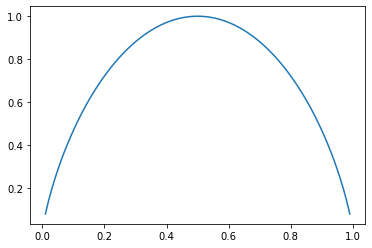

In [36]:
from matplotlib import pyplot as plt
import numpy as np

#func = []
x = np.linspace(0.00, 1.00, 100)
#for pt in x:
    #func.append(-pt*np.log2(pt) - (1-pt)*np.log2(1-pt))

plt.plot(x, -x*np.log2(x) - (1-x)*np.log2(1-x))
plt.show()